# MSA 2023 Phase 2 - Part 2

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and split preprocessed data

In [2]:
# Load the CSV file

df_data_salaries = pd.read_csv('Resources/datasets/preprocessed_salaries.csv')
df_data_salaries.head(5)

,work_year,experience_level,job_title,salary_in_usd
0,3,3,84,85847
1,3,2,66,30000
2,3,2,66,25500
3,3,3,47,175000
4,3,3,47,120000


In [3]:
df_data_salaries.tail(5)

,work_year,experience_level,job_title,salary_in_usd
3750,0,3,47,412000
3751,1,2,84,151000
3752,0,0,47,105000
3753,0,0,17,100000
3754,1,3,45,94665


In [4]:
print(df_data_salaries['job_title'].nunique())

93


In [5]:
df_data_salaries.info()
df_data_salaries.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         3755 non-null   int64
 1   experience_level  3755 non-null   int64
 2   job_title         3755 non-null   int64
 3   salary_in_usd     3755 non-null   int64
dtypes: int64(4)
memory usage: 117.5 KB


,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2.373635,0.691448,0.0,2.0,2.0,3.0,3.0
experience_level,3755.0,2.469241,0.906261,0.0,2.0,3.0,3.0,3.0
job_title,3755.0,39.661784,18.536695,0.0,27.0,33.0,47.0,92.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0


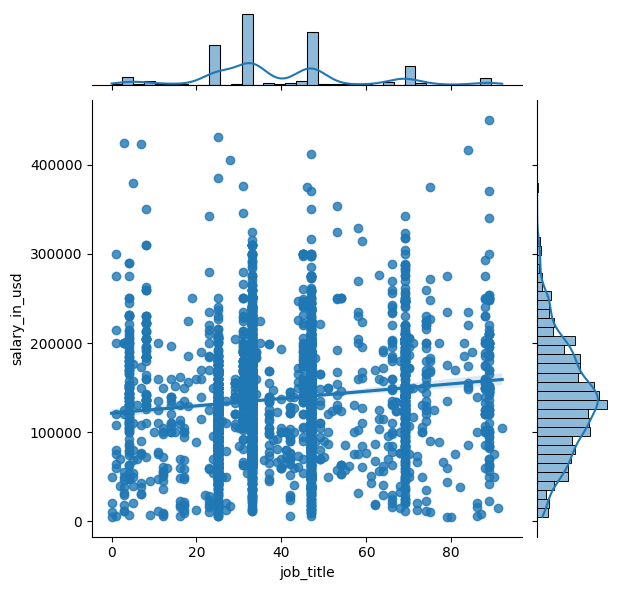

In [6]:
sns.jointplot(data=df_data_salaries, 
              x='job_title', y='salary_in_usd', kind='reg')

the data spread pretty far away from the regression line.

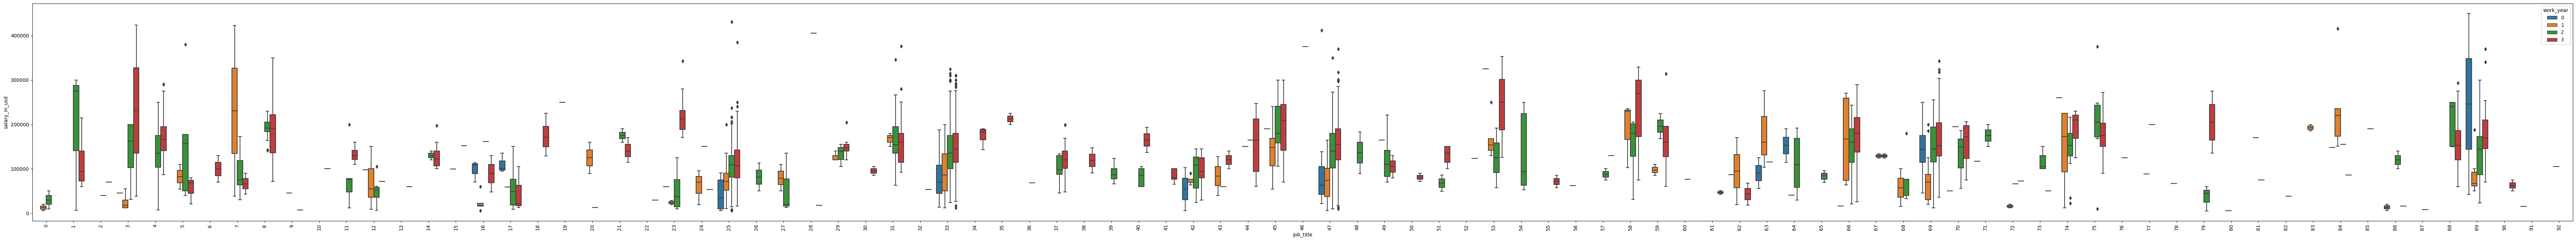

In [7]:
plt.figure(figsize=(df_data_salaries['job_title'].nunique(), 8))
sns.boxplot(data=df_data_salaries, x='job_title', y='salary_in_usd', 
              hue='work_year')
plt.xticks(rotation='vertical')
plt.show()

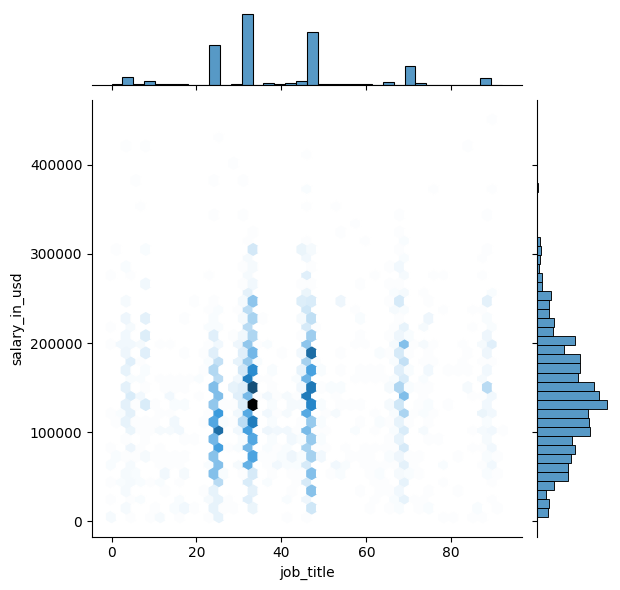

In [8]:
sns.jointplot(data=df_data_salaries, 
              x='job_title', y='salary_in_usd', kind='hex')

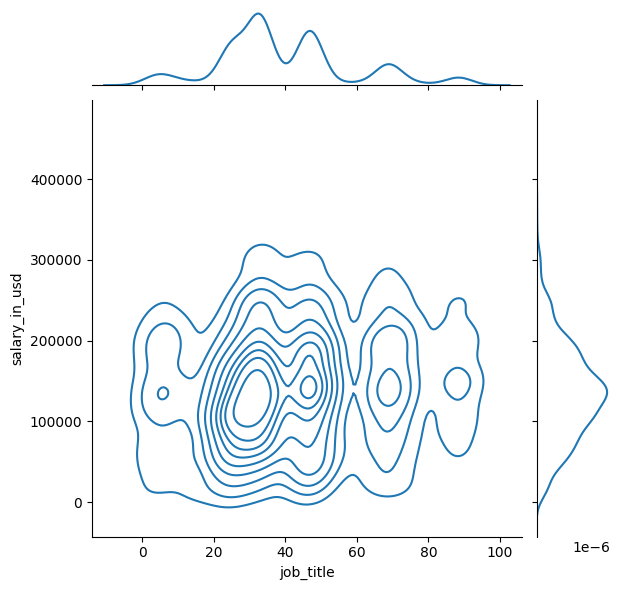

In [9]:
sns.jointplot(data=df_data_salaries, 
              x='job_title', y='salary_in_usd', kind='kde')

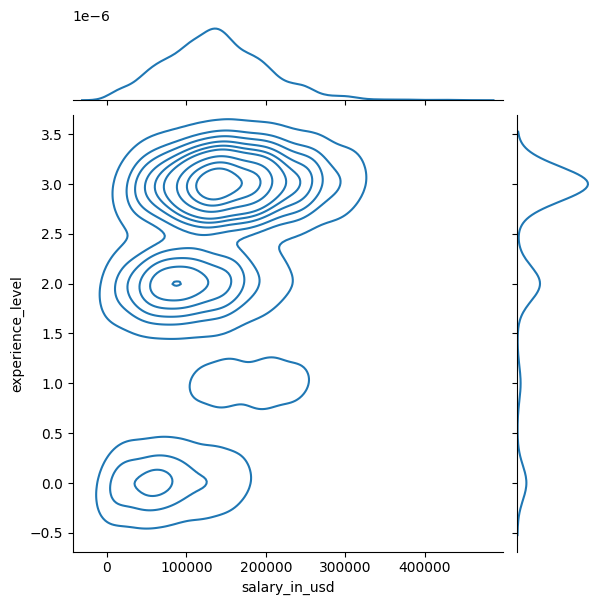

In [10]:
sns.jointplot(data=df_data_salaries, 
              x='salary_in_usd', y='experience_level', kind='kde')

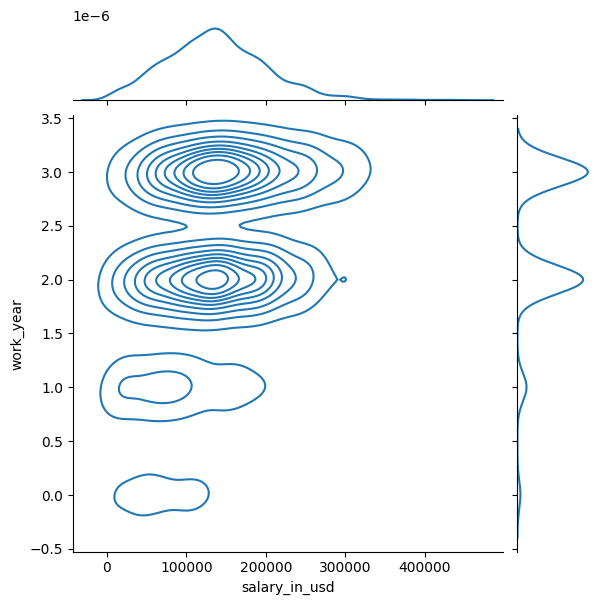

In [11]:
sns.jointplot(data=df_data_salaries, 
              x='salary_in_usd', y='work_year', kind='kde')

## 2. Choose an algorithm

In [12]:
# load the required library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [13]:
# Split data into features (X) and target (y)
X = df_data_salaries[['work_year','experience_level','job_title']]
y = df_data_salaries['salary_in_usd']

In [14]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

## 3. Train and test a model

In [15]:
# Create and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = model.predict(X_test)

## 4. Evaluate the model 

In [16]:
# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3327878515.8487897


To be honest, the result is a little bit odd. 
I will see what result could be using other models.

In [17]:
# Initialize and train the Decision Tree Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3133434619.8604913


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Initialize and train the MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), random_state=6)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 21747991290.478867


d:\Downloads\MSA_NZ_2023\NZMSA-2023-Phase-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
from sklearn.svm import SVR

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Initialize and train the SVR model
model = SVR()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3851349877.376732


In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=7)

# Initialize and train the K-Nearest Neighbors Regressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3030818056.6106524


In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Initialize and train the Gradient Boosting Regression model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2765723803.1982293


In [23]:
# Let's try clustering model, see if it perfor better than regression models.
from sklearn.neighbors import KernelDensity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Create a KDE model for each categorical column
kde_models = {}
for col in ['work_year', 'experience_level', 'job_title']:
    kde = KernelDensity(bandwidth=0.5)  # Might need to adjust the bandwidth parameter
    kde.fit(X_train[col].values.reshape(-1, 1))
    kde_models[col] = kde

# Predict salary_in_usd using the KDE models
y_pred = []
for index, row in X_test.iterrows():
    pred_values = []
    for col in ['work_year', 'experience_level', 'job_title']:
        kde = kde_models[col]
        pred_value = kde.score_samples([[row[col]]])
        pred_values.append(pred_value)
    predicted_salary_in_usd = sum(pred_values)
    y_pred.append(predicted_salary_in_usd)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 22343869021.84339


In [24]:
# Let's try clustering model, Mini Batch K-Means.
from sklearn.cluster import MiniBatchKMeans

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Create and train the Mini Batch KMeans model
n_clusters = 5  # Might adjust the number of clusters
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Predict cluster labels for test data
cluster_labels = kmeans.predict(X_test)

# Calculate cluster means for salary_in_usd
cluster_means = []
for cluster_idx in range(n_clusters):
    cluster_mask = cluster_labels == cluster_idx
    cluster_mean = y_test[cluster_mask].mean()
    cluster_means.append(cluster_mean)
    
# Predict salary_in_usd based on cluster means
y_pred = [cluster_means[label] for label in cluster_labels]

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

d:\Downloads\MSA_NZ_2023\NZMSA-2023-Phase-2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Mean Squared Error: 3685759369.1965766


I thought based on the plot diagram, it shows pattern seem likely resultable by using clustering methods. Although clustering methods are not typically used for regression tasks like predicting numeric values (in our case, predict salary_in_usd).

## 5. Summary

I tried various model on the salary data set. 
Below is the result:

Random Forest Regressor MSE: 3327878515.8487897

Decision Tree Regressor MSE: 3133434619.8604913

MLPRegressor            MSE:21747991290.478867

Support Vector Machines MSE: 3851349877.376732

K-Nearest Neighbors Regressor 
                        MSE: 3030818056.6106524
                        
Gradient Boosting Regression
                        MSE: 2765723803.1982293

Kernel Density Clustering:
                        MSE: 22343869021.84339
Mini Batch K-Means Clustering:
                        MSE: 3685759369.1965766

Therefore, Gradient Boosting Regression has the best MSE result.